# Web Scraping

## Secion 1: Qué es web scraping

Tecnica utilizada para extraer informacion de forma automatica desde diversos
sitios web

De esta manera, es posible obtener un gran volumen de data para hacer diversos analisis.

La ventaja que tiene con respecto a usar APIs oficiales de las paginas, es que se pueden saltar las limitantes (cantidad de request,cantidad de informacion extraida,etc) ademas de poder obtener informacion que pudiese no estar (fecha por ejemplo) 

Existe distintos ejemplos de paginas que hacen web scraping:

* Knasta
* SoloTodos
* Entre muchas más



### ¿Como funciona?

Cuando uno ingresa a una URL, el navegador hace un GET y nos entrega archivos especificos para visualizarlo (HTML,CSS,JS). En esta ocasion solo se trabajara con HTML, pero tambien es posible usar CSS para hacer el scraping.

Por lo tanto, para hacer scraping hay que considerar dos cosas:
* Una forma para hacer una peticion GET o POST

En casi todos los lenguajes de programacion existen herramientas/clases/paquetes que permiten hacer peticiones hacia una pagina por lo que no es un problema.

* Una forma para extraer la informacion del HTML

Por otra parte, lo que se necesita aqui es una herramienta que ayude a analizar gramaticalmente (hacer parsing) el HTML, de manera que sea sencillo recorrerlo y llegar a la informacion que uno quiere.


### ¿Que herramientas existen?

En python existen varias:

<div>
<img src="https://miro.medium.com/max/1200/1*YJNS0JVl7RsVDTmORGZ6xA.png" width="200" />
</div>
* Scrapy: Herramienta para proyectos de scraping grandes y elaborados. Hace uso de cache, es posible hacer rotacion de proxie, entre otros.

<div>
<img src="https://requests.readthedocs.io/es/latest/_static/requests-sidebar.png" width="150" />
</div>

* Request: Usado para hacer una llamada GET o POST a la URL.
* Beautifulsoup: Usado para hacer parsing, usado junto a request normalmente


<div>
<img src="https://requests.readthedocs.io/projects/requests-html/en/latest/_static/requests-html-logo.png" width="150"/>
</div>


* request_html: Implementa las llamadas a la URL, y permite hacer parsing usando XPath (vamos a usar este ya que el parsing de XPath es muy util)

## ¿Qué es XPath (XML Path Language) ?
Es un lenguaje que nos ayuda a recorrer de forma más sencilla archivos similares a XML, como lo es HTML.

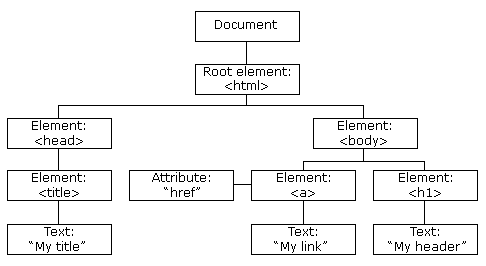

Una forma de representar un archivo HTML, es mediante un arbol, en donde cada nodo es un elemento del archivo en donde existen relaciones jerarquicas.

La ventaja de XPath, a diferencia de otras formas para hacer scraping, es que permite tener una extraer de forma más eficiente (menos codigo) la informacion que queremos mediante "querys". Con las querys podemos acceder a los distintos elementos (div,h1,h2,date-time) que estan en un HTML, mediante sus clases o sencillamente extraer todo.


## Secion 2: Revision basica de Web Scraping (codigo)

### Paso 0: Importar el archivo a analizar y seleccionar el medio

##### Importamos el archivo usando pandas

In [6]:
import pandas as pd
news_df = pd.read_csv("Chile.csv")


In [7]:
news_df

,fecha,medio,seguidores,texto,URL
0,"June 30th 2020, 18:16:00.000",DiarioConce,"49,278","Del total de nuevos contagios, 2.690 fueron si...",https://twitter.com/i/web/status/1278089932100...
1,"June 30th 2020, 18:10:00.000",elmostrador,"1,761,140",Clínica Santa María informa que el senador Oss...,https://twitter.com/i/web/status/1278088422096...
2,"June 30th 2020, 17:44:08.000",biobio,"3,199,930",👇 ACTUALIZADO | https://t.co/rZjlM2k1WY,https://www.biobiochile.cl/noticias/nacional/c...
3,"June 30th 2020, 16:40:43.000",AgriculturaFM,"129,485",La Casa Blanca advierte que EE.UU. puede llega...,http://921.cl/2wk9
4,"June 30th 2020, 16:18:49.000",latercera,"1,939,924",Ossandón y su extraña recaída: lo que la cienc...,https://twitter.com/i/web/status/1278060443337...
...,...,...,...,...,...
11694,"January 12th 2020, 12:14:45.000",CHVNoticias,"1,022,270",Autoridades entregan recomendaciones para evit...,https://bit.ly/30ejxkZ
11695,"January 10th 2020, 15:35:54.000",eltipografo,"31,003",Primer caso de sospecha de contagio de virus H...,http://ow.ly/oFuK30q8sbR
11696,"January 6th 2020, 09:10:43.000",LaPrensAustral,"22,242",En Magallanes se duplicó el contagio de varice...,http://laprensaaustral.cl/cronica/en-magallane...
11697,"January 4th 2020, 17:15:00.000",latercera,"1,904,723",🇨🇱🛬🇦🇷 Conoce las recomendaciones para evitar c...,https://twitter.com/i/web/status/1213554441342...


##### Seleccionamos un medio en especifico

In [8]:
biobio_news_df = news_df[news_df.medio == 'biobio']

##### Tomamos la primera URL

In [9]:
url_base = biobio_news_df['URL'].iloc[0]

### Paso 1: creamos la sesion para poder hacer GET a la pagina

In [10]:
import requests_html
session = requests_html.HTMLSession()
renderedPage = session.get(url_base)

#### Revisamos cual es el codigo HTML que nos entrega de vuelta.

Recordatorio:

* Codigo 200: OK. Fue un get exitoso.
* Codigo 403: Prohibido. No es posible hacer el get, quizas requiera un header
* Codigo 404: Pagina no encontrada.

In [11]:
renderedPage.status_code

200

Si el codigo es 200, entonces analizamos el cotenido de la pagina

### Paso 2: Creacion de queries usando XPath

#### Primera Query
#### Tomar todo el contenido de la pagina

El argumento que escribimos en xpath nos dice lo siguiente
* Tomar toda la pagina //
* Tomar todo los elementos *
Ademas se puede recorrer como una lista

In [12]:
renderedPage.html.xpath("//*")

for element in renderedPage.html.xpath("//*"):
    print(element)

<Element 'html' lang='es'>
<Element 'head' data-id-nota='4500275'>
<Element 'meta' charset='utf-8'>
<Element 'meta' http-equiv='X-UA-Compatible' content='IE=edge'>
<Element 'meta' name='viewport' content='width=device-width,initial-scale=1.0'>
<Element 'meta' name='description' content='La Red de Prensa Más Grande de Chile'>
<Element 'link' rel=('apple-touch-icon',) sizes='57x57' href='https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-57x57.png'>
<Element 'link' rel=('apple-touch-icon',) sizes='60x60' href='https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-60x60.png'>
<Element 'link' rel=('apple-touch-icon',) sizes='72x72' href='https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-72x72.png'>
<Element 'link' rel=('apple-touch-icon',) sizes='76x76' href='https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-76x76.png'>
<Element 'link' rel=('apple-touch-icon',) sizes='114x114' href='https://www.biobiochi

#### Con attrs, se puede ver los atributos que tiene el elemento

In [13]:


for element in renderedPage.html.xpath("//*"):
    print(element.attrs)

{'lang': 'es'}
{'data-id-nota': '4500275'}
{'charset': 'utf-8'}
{'http-equiv': 'X-UA-Compatible', 'content': 'IE=edge'}
{'name': 'viewport', 'content': 'width=device-width,initial-scale=1.0'}
{'name': 'description', 'content': 'La Red de Prensa Más Grande de Chile'}
{'rel': ('apple-touch-icon',), 'sizes': '57x57', 'href': 'https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-57x57.png'}
{'rel': ('apple-touch-icon',), 'sizes': '60x60', 'href': 'https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-60x60.png'}
{'rel': ('apple-touch-icon',), 'sizes': '72x72', 'href': 'https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-72x72.png'}
{'rel': ('apple-touch-icon',), 'sizes': '76x76', 'href': 'https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-76x76.png'}
{'rel': ('apple-touch-icon',), 'sizes': '114x114', 'href': 'https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-114x114.png'}
{'rel': ('appl

{'href': '/portada/deportes', 'class': ('nav-link',)}
{'class': ('nav-item',)}
{'href': '/lista/busca-2020/categorias/sociedad', 'class': ('nav-link',)}
{'class': ('nav-item',)}
{'href': '/lista/busca-2020/categorias/opinion', 'class': ('nav-link',)}
{'class': ('nav-item',)}
{'href': '/especial/reportajes', 'class': ('nav-link',)}
{'class': ('nav-item',)}
{'href': '/biobiotv', 'class': ('nav-link',)}
{'class': ('bbtv-logo',), 'src': '/assets/escritorio/bbcl-2020/img/bbtv-logo-2.png'}
{'class': ('alliances-social-container',)}
{'class': ('alliances-container',)}
{'class': ('alliances-container-title',)}
{'class': ('alliances-navs-container',)}
{'class': ('alliances-nav-container',)}
{'class': ('alliances-title',)}
{'class': ('nav',)}
{'class': ('nav-item',)}
{'class': ('nav-link',), 'href': 'https://www.dw.com/es/', 'target': '_blank'}
{'class': ('alliance-logo',), 'src': '/assets/escritorio/bbcl-2020/img/alliances/dw-logo-dark.png', 'alt': 'Deutsche Welle'}
{'class': ('nav-item',)}
{'c

#### Para acceder a los elementos, se debe acceder como element.attrs['nombreDelAtributo']
#### Por ejemplo vamos a acceder solo a los elementos que tengan href

In [14]:


for element in renderedPage.html.xpath("//*"):
    try:
        print(element.attrs['href'])
    except:
        pass

https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-57x57.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-60x60.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-72x72.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-76x76.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-114x114.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-120x120.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-144x144.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-152x152.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/apple-touch-icon-180x180.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/icon-32x32.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/icon-194x194.png
https://www.biobiochile.cl/assets/biobiochile/img/icons/icon-96x96.png
https://www.biobiochile.cl/a

### Segunda Query
#### Tomar todas las imagenes
Estamos tomando toda la pagina //

Estamos tomando solo los elementos de tipo 'img'

In [15]:


for element in renderedPage.html.xpath("//img"):
    try:
        print(element.attrs['src'])
    except:
        pass

https://d5nxst8fruw4z.cloudfront.net/atrk.gif?account=cFNEk1ao6C52uG
/assets/escritorio/bbcl-2020/img/bbcl-logo.png
/assets/escritorio/bbcl-2020/img/bbcl-logo-dark.png
/assets/escritorio/bbcl-2020/img/bbcl-logo.png
/assets/escritorio/bbcl-2020/img/bbcl-logo-dark.png
/assets/escritorio/bbcl-2020/img/bbtv-logo.png
/assets/escritorio/bbcl-2020/img/bbtv-logo-dark.png
/assets/escritorio/bbcl-2020/img/btn-app-apple.png
/assets/escritorio/bbcl-2020/img/btn-app-google.png
/assets/escritorio/bbcl-2020/img/btn-app-huawei.png
/assets/escritorio/bbcl-2020/img/bbtv-logo.png
/assets/escritorio/bbcl-2020/img/bbtv-logo-dark.png
/assets/escritorio/bbcl-2020/img/bbcl-logo.png
/assets/escritorio/bbcl-2020/img/bbcl-logo-dark.png
/assets/escritorio/bbcl-2020/img/bbcl-logo.png
/assets/escritorio/bbcl-2020/img/bbcl-logo-dark.png
/assets/escritorio/bbcl-2020/img/bbtv-logo.png
/assets/escritorio/bbcl-2020/img/bbtv-logo-dark.png
/assets/escritorio/bbcl-2020/img/btn-app-apple.png
/assets/escritorio/bbcl-2020/img

### Tercera Query
#### Tomar todos los elementos de una clase en especifico

Los distintos elementos del HTML tienen clases, asi que solo hay que elegir una en especifico

Toda la pagina //
Todos los elementos con clase 'post-image'

In [16]:
for element in renderedPage.html.xpath("//div[@class='post-image']"):
    print("Element attributes")
    print(element.attrs)
    print("Keys attributes of elements")
    print(element.attrs.keys())
    print(" ")


Element attributes
{'class': ('post-image',), 'style': 'background-image: url(https://media.biobiochile.cl/wp-content/uploads/2020/03/graficos-actualizados-region.jpg);'}
Keys attributes of elements
dict_keys(['class', 'style'])
 
Element attributes
{'class': ('post-image',), ':style': "'background-image: url(https://media.biobiochile.cl/wp-content/uploads/' + post.post_image.thumbnails.medium.URL + ');'"}
Keys attributes of elements
dict_keys(['class', ':style'])
 


#### Nota
Tomar en cuenta element.attrs y la funcion element.attrs.keys(), ya que sirve 
para saber cual es el contenido de todos los atributos y como llamarlos

### Cuarta Query
#### Tomar todo el texto
Usualmente el texto esta en los elementos p

Query: Toda la pagina //, todos los elementos p

In [17]:


for element in renderedPage.html.xpath("//p"):
    print(element)



<Element 'p' class=('link-box-info',)>
<Element 'p' class=('link-box-info',)>
<Element 'p' class=('link-box-info',)>
<Element 'p' class=('link-box-info',)>
<Element 'p' class=('link-box-info',)>
<Element 'p' class=('link-box-info',)>
<Element 'p' class=('mmb-10',)>
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' >
<Element 'p' class=('titulo',)>
<Element 'p' class=('mmb-10',)>
<Element 'p' v-if='post.publishers && post.publishers.length' class=('mmb-10',)>
<Element 'p' class=('copy',)>
<Element 'p' class=('developed-by',)>


#### Pero esto no nos muestra el texto!!

### Para obtener el texto existen dos formas
#### 1.- usar la funcion text() integrada en xpath

In [18]:


for element in renderedPage.html.xpath("//p/text()"):
    print(element)


                                        Ingresa tu rut o nombre completo y conoce si tus documentos extraviados están en
                                        nuestros estudios.
                                    

                                        Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem
                                        Ipsum.
                                    

                                        Escucha las 8 estaciones de Radio Bío Bío con su aplicación oficial.
                                    

                                            Ingresa tu rut o nombre completo y conoce si tus documentos extraviados
                                            están en nuestros estudios.
                                        

                                            Lorem Ipsum is simply dummy text of the printing and typesetting industry.
                                            Lorem Ipsum.
                      

#### 2.- usar el atributo .text

In [19]:


for element in renderedPage.html.xpath("//p"):
    print(element.text)

Ingresa tu rut o nombre completo y conoce si tus documentos extraviados están en nuestros estudios.
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum.
Escucha las 8 estaciones de Radio Bío Bío con su aplicación oficial.
Ingresa tu rut o nombre completo y conoce si tus documentos extraviados están en nuestros estudios.
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum.
Escucha las 8 estaciones de Radio Bío Bío con su aplicación oficial.
por Christian Leal
*Nota actualizada al 28/07/2020
Con 1.876 nuevos casos confirmados, Chile sigue aumentando el número de contagios por coronavirus Sars-CoV-2 -que causa la enfermedad covid-19- en nuestro país, totalizando 349.800 personas sobre las cuales el test ha dado positivo.
Sin embargo, los contagios no se distribuyen de la misma forma a lo largo del territorio nacional. Actualmente, las regiones más afectadas por la curva de progreso de la pandemia son la Metropolitana co

### Quinta Query
Tomar todo el texto pero que solo esté en la noticia...

En esencia es similar a la tercera query, pero se necesita más precision.




### Nota importante

Aqui es cuando nos ayuda mucho el inspector de elementos



<div>
<img src="https://www.wikihow.com/images/0/0a/Inspect-Element-on-Chrome-Step-7.jpg" width="400" />
</div>

Con el inspector de elementos podemos ver como como es la estructura HTML de una forma más intuitiva.

#### Más precision
Como queremos ser más precisos revisamos el elemento div de clase banners-contenido-nota-4500275 y tratamos de tomar el texto

Query: Tomamos la pagina, Tomamos el div que tiene clase ...nota-4500275 , Tomamos todos los elementos p

In [20]:
#4500275
for element in renderedPage.html.xpath("//div[@class='banners-contenido-nota-4500275']//p"):
    print(element.text)

*Nota actualizada al 28/07/2020
Con 1.876 nuevos casos confirmados, Chile sigue aumentando el número de contagios por coronavirus Sars-CoV-2 -que causa la enfermedad covid-19- en nuestro país, totalizando 349.800 personas sobre las cuales el test ha dado positivo.
Sin embargo, los contagios no se distribuyen de la misma forma a lo largo del territorio nacional. Actualmente, las regiones más afectadas por la curva de progreso de la pandemia son la Metropolitana con 253.688 casos confirmados, de Valparaíso con 17.146 y Antofagasta con 14.371.
A continuación, les mostramos con gráficos cómo han evolucionado los contagios en cada región de Chile, estableciendo la cantidad de casos confirmados, así como la cantidad según su proporción de habitantes.
349.800 casos confirmados
253.688 casos confirmados
17.146 casos confirmados
14.371 casos confirmados
10.836 casos confirmados
10.328 casos confirmados
8.718 casos confirmados
8.585 casos confirmados
5.913 casos confirmados
3.978 casos confirmad

###### Funciona bastante bien!!
###### Sin embargo, si probamos con otra pagina del mismo medio...

In [23]:
url_base=biobio_news_df['URL'].iloc[2]
session = requests_html.HTMLSession()
renderedPage = session.get(url_base)

##### Y probamos con la misma Query...

In [24]:
for element in renderedPage.html.xpath("//div[@class='banners-contenido-nota-4500275']"):
    print(element.text)

##### No entrega ningun output, porque la clase ...nota-4500275 es especifica para la noticia, por lo que hay que tratar de encontrar la query que sea más generica.

## Secion 3: Ejercicios

#### Ejercicio 1: rehacer la query para que sea generica
Tiene que ser probada en al menos 5 paginas.

In [ ]:
for element in renderedPage.html.xpath("//div[@class='???'']"):
    print(element.text)

#### Ejercicio 2: Tomar la fecha y el titulo de la noticia

In [ ]:
for element in renderedPage.html.xpath("//???"):
    continue

for element in renderedPage.html.xpath("//???"):
    continue

#### Ejercicio 3: Tomar la categoria del post

#### Ejercicio 4: Hacer del ejercicio 1 al 3, pero con otra pagina

### Una vez que ya se tiene la informacion necesaria para hacer scraping se puede usar nuestra lista de URLs en nuestro dataframe

In [ ]:
list_of_url_text = []
for URL in biobio_news_df['URL']:
    session = requests_html.HTMLSession()
    renderedPage = session.get(URL)
    
    if(renderedPage.status_code!=200):
        print("Bad status code: "+renderedPage.status_code)
        continue
    
    text_elements = renderedPage.html.xpath("//div[@class='...']")

    if(len(text_elements)==0):
        print("Can't scrap "+ URL)
        continue

        

### Problemas que uno se puede encontrar haciendo scraping

#### 1.- La pagina tiene paywall, ejemplo --> https://www.wsj.com
#### 2.- La pagina es dinamica (se puede arreglar con headers o rendering ), ejemplo --> https://digital.elmercurio.com/2020/07/30/A/2I3R5AHQ#zoom=page-width 
#### 3.- Error de hacer demasiadas consultas!!!

## Seccion Extra: como obtener informacion desde twitter sin usar su API

A veces es complejo tomar la informacion de twitter, la API cada vez es más dificil de obtener o a veces se demora
mucho tiempo en aceptar.

Para eso, existen paquetes como twitter_scraper, que nos ayudan a sacar informacion de los tweets

In [5]:


from twitter_scraper import get_tweets
for tweet in get_tweets('biobio', pages=1):
    print("tweet id status: " +tweet['tweetUrl'])
    print("Tweet text: "+tweet['text'])

tweet id status: /biobio/status/1288943494539739138
Tweet text: “Estamos viviendo algo histórico tras el comienzo de retiros parciales de fondos de pensiones”, dijo un experto, y ello está generando reacciones en los mercados y en el precio del dólar. https://www.biobiochile.cl/noticias/economia/actualidad-economica/2020/07/30/jornada-historica-solicitud-retiro-10-afp-lleva-al-dolar-registros-minimos-meses.shtml …
tweet id status: /biobio/status/1288939824842514434
Tweet text: "Santiago está en condiciones de abrirse”, aseguró el alcalde. https://www.biobiochile.cl/noticias/nacional/region-metropolitana/2020/07/30/alessandri-pide-al-minsal-iniciar-desconfinamiento-santiago-creo-ya-estan-las-condiciones.shtml …
tweet id status: /biobio/status/1288939039215751170
Tweet text:  AHORA | La decisión de la Corte de Apelaciones de #Temuco fue unánime. https://www.biobiochile.cl/noticias/nacional/region-de-la-araucania/2020/07/30/justicia-rechaza-recurso-amparo-favor-celestino-cordova-otorgar-a

##### Con el comando de arriba, se deberia poder extraer el contenido, y compar el id (numero del final), con los que estan en la base de datos, y hacer cruze de datos